# Walmart Sales Prediction

You are provided with historical sales data for 45 Walmart stores located in different regions. Each store contains a number of departments, and you are tasked with predicting the department-wide sales for each store.

In addition, Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of which are the Super Bowl, Labor Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday
weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df1 = pd.read_csv('/home/madanmaram/Lockdown/Algorithms Practice/walmart csv/train.csv')
df2 = pd.read_csv('/home/madanmaram/Lockdown/Algorithms Practice/walmart csv/features.csv')
df3 = pd.read_csv('/home/madanmaram/Lockdown/Algorithms Practice/walmart csv/stores.csv')

print(df1.head(3))

print('\n')
print(df2.head(3))
print('\n')
print(df3.head(3))

   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False


   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  


   Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392


In [6]:
print(df1.shape)
print(df2.shape)
print(df3.shape)

(421570, 5)
(8190, 12)
(45, 3)


In [ ]:
# here iam merging all datasets into single data

In [9]:
df = df1.merge(df2, how = 'left').merge(df3, how = 'left')
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,B,118221
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,B,118221
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,B,118221
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,B,118221


# EDA

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       150681 non-null float64
MarkDown2       111248 non-null float64
MarkDown3       137091 non-null float64
MarkDown4       134967 non-null float64
MarkDown5       151432 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
Type            421570 non-null object
Size            421570 non-null int64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [11]:
df.isna().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

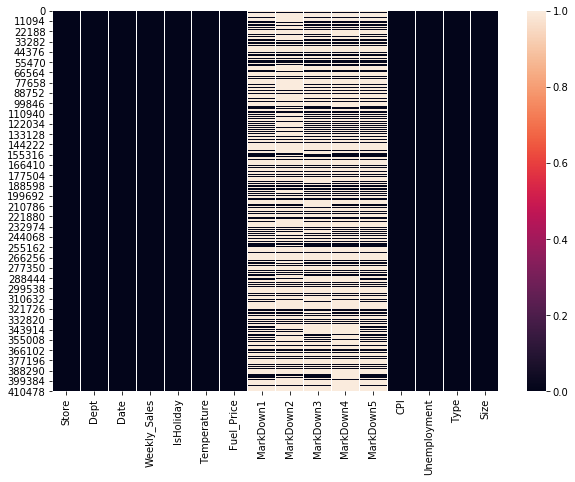

In [14]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(df.isna())

## single variable analysis

In [19]:
df['Store'][:10]

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: Store, dtype: int64

In [20]:
df['Store'].value_counts(ascending = False)

13    10474
10    10315
4     10272
1     10244
2     10238
24    10228
27    10225
34    10224
20    10214
6     10211
32    10202
19    10148
31    10142
28    10113
41    10088
11    10062
23    10050
14    10040
40    10017
15     9901
8      9895
39     9878
17     9864
18     9859
26     9854
25     9804
7      9762
12     9705
22     9688
45     9637
21     9582
35     9528
29     9455
16     9443
3      9036
5      8999
9      8867
38     7362
37     7206
44     7169
30     7156
42     6953
43     6751
33     6487
36     6222
Name: Store, dtype: int64

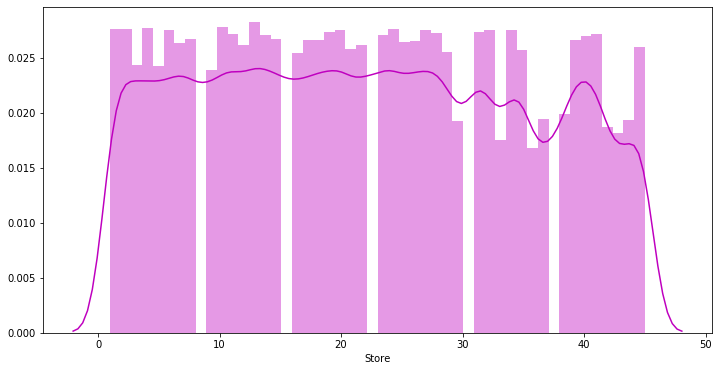

In [21]:
plt.figure(figsize= (12,6))
sns.distplot(df['Store'],color = 'm')
plt.show()

## dept

In [22]:
df['Dept'].value_counts()

1     6435
10    6435
38    6435
21    6435
67    6435
      ... 
78     235
77     150
65     143
39      16
43      12
Name: Dept, Length: 81, dtype: int64

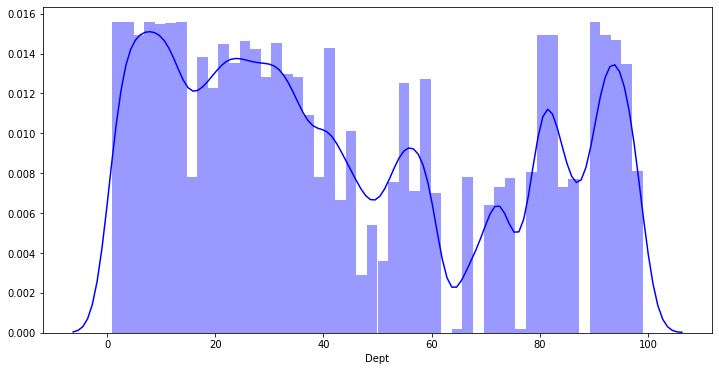

In [24]:
plt.figure(figsize= (12,6))
sns.distplot(df['Dept'],color = 'b')
plt.show()

## weekly sales

In [27]:
df['Weekly_Sales'][:10]

0    24924.50
1    46039.49
2    41595.55
3    19403.54
4    21827.90
5    21043.39
6    22136.64
7    26229.21
8    57258.43
9    42960.91
Name: Weekly_Sales, dtype: float64

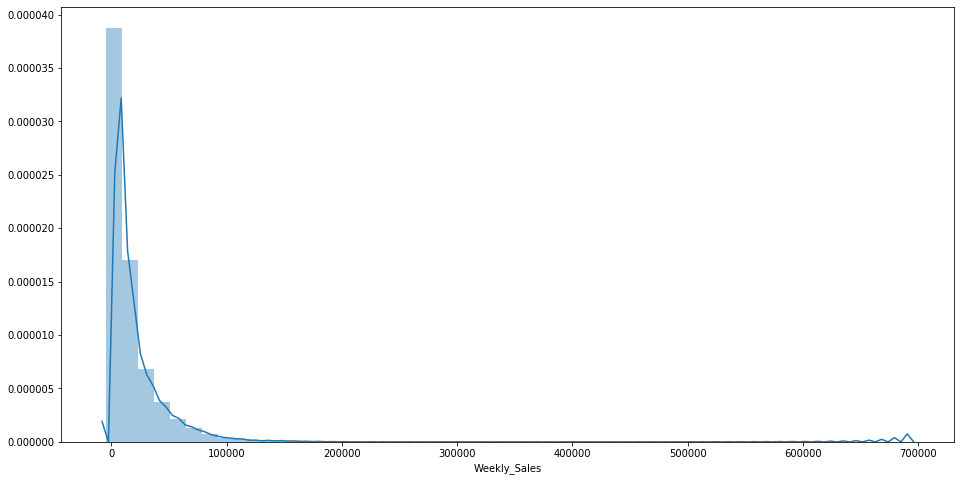

In [28]:
plt.figure(figsize= (16,8))
sns.distplot(df['Weekly_Sales'])
plt.show()

## IsHoliday

In [29]:
df['IsHoliday'].value_counts()

False    391909
True      29661
Name: IsHoliday, dtype: int64

In [30]:
df['IsHoliday'].value_counts(normalize=True)

False    0.929642
True     0.070358
Name: IsHoliday, dtype: float64

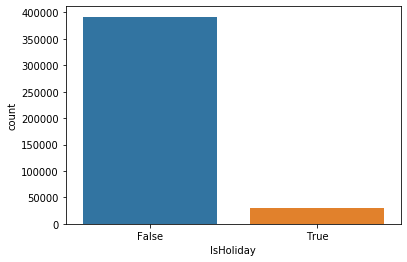

In [32]:
sns.countplot(df['IsHoliday'])
plt.show()

## Temprature

In [39]:
df['Temperature'][:10]

0    42.31
1    38.51
2    39.93
3    46.63
4    46.50
5    57.79
6    54.58
7    51.45
8    62.27
9    65.86
Name: Temperature, dtype: float64

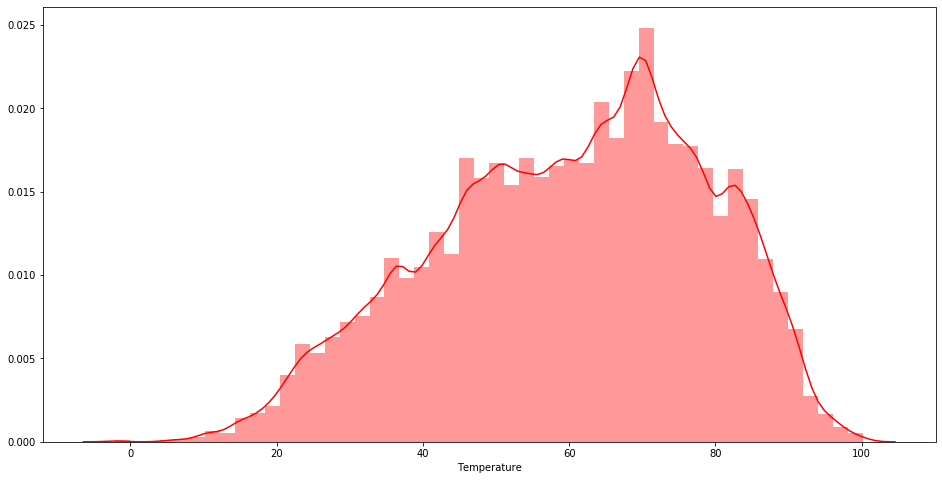

In [42]:
plt.figure(figsize= (16,8))
sns.distplot(df['Temperature'],color='r')
plt.show()

## Fuel Price

In [43]:
df['Fuel_Price'][:10]

0    2.572
1    2.548
2    2.514
3    2.561
4    2.625
5    2.667
6    2.720
7    2.732
8    2.719
9    2.770
Name: Fuel_Price, dtype: float64

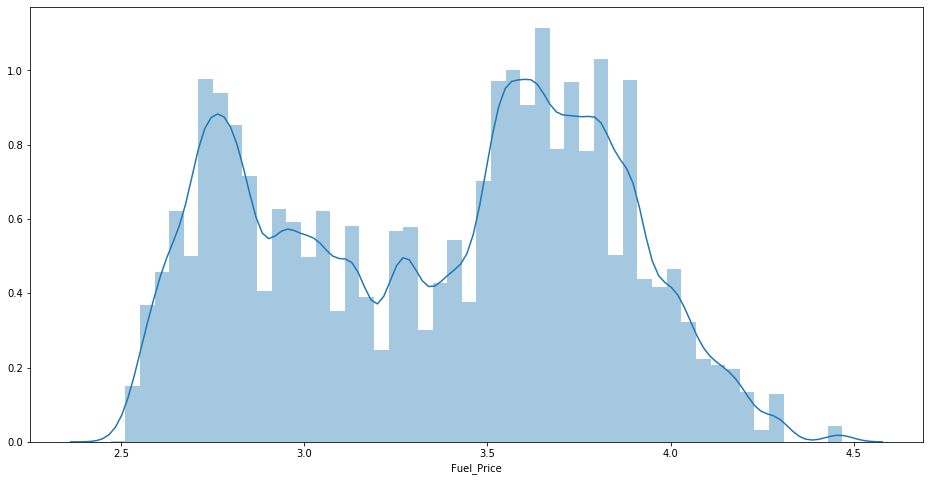

In [45]:
plt.figure(figsize= (16,8))
sns.distplot(df['Fuel_Price'])
plt.show()

## CPI

In [46]:
df['CPI'][:10]

0    211.096358
1    211.242170
2    211.289143
3    211.319643
4    211.350143
5    211.380643
6    211.215635
7    211.018042
8    210.820450
9    210.622857
Name: CPI, dtype: float64

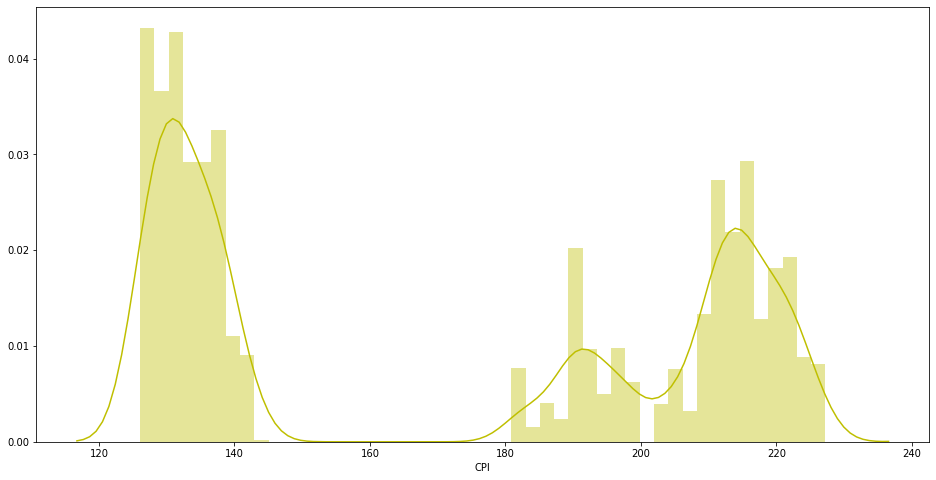

In [47]:
plt.figure(figsize= (16,8))
sns.distplot(df['CPI'],color='y')
plt.show()

## unemployment

In [49]:
df['Unemployment'][:10]

0    8.106
1    8.106
2    8.106
3    8.106
4    8.106
5    8.106
6    8.106
7    8.106
8    7.808
9    7.808
Name: Unemployment, dtype: float64

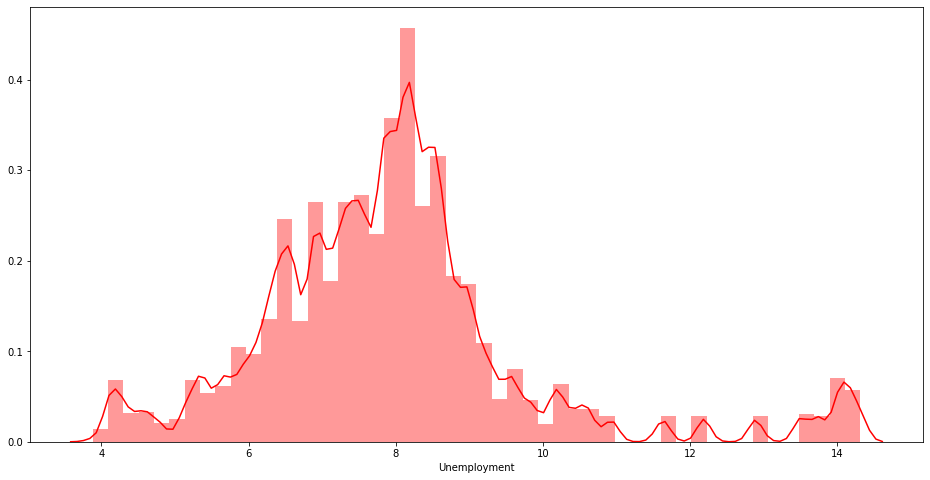

In [50]:
plt.figure(figsize= (16,8))
sns.distplot(df['Unemployment'],color='r')
plt.show()

## Type

In [51]:
df['Type'].value_counts()

A    215478
B    163495
C     42597
Name: Type, dtype: int64

In [52]:
df['Type'].value_counts(normalize = True)

A    0.511132
B    0.387824
C    0.101044
Name: Type, dtype: float64

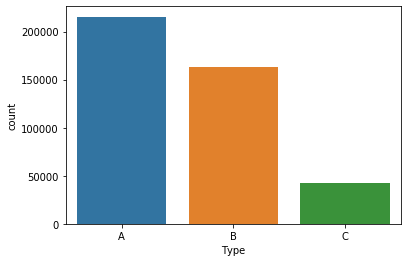

In [53]:
sns.countplot(df['Type'])
plt.show()

## size

In [56]:
df['Size'][:10]

0    151315
1    151315
2    151315
3    151315
4    151315
5    151315
6    151315
7    151315
8    151315
9    151315
Name: Size, dtype: int64

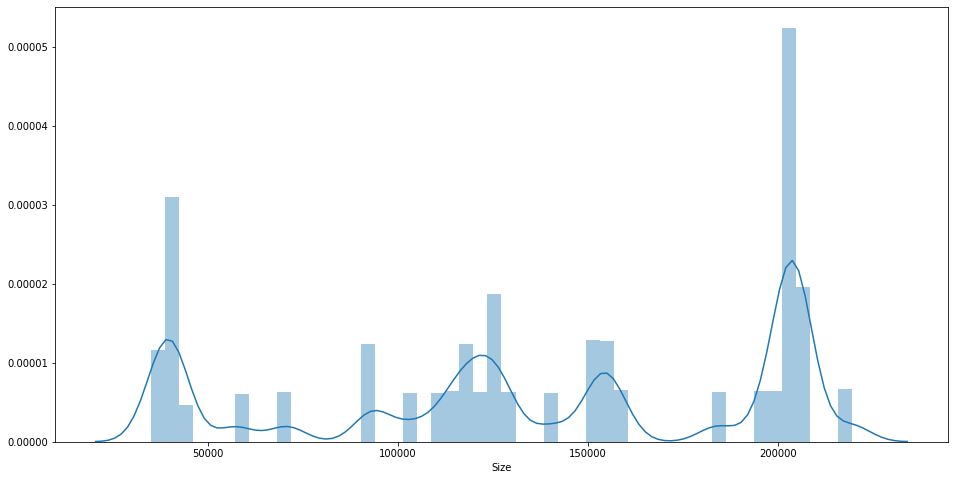

In [57]:
plt.figure(figsize= (16,8))
sns.distplot(df['Size'])
plt.show()

# Expoort the dataset

In [72]:
#df.to_csv('walmart_new.csv',index = False)

In [1]:
df = pd.read_csv(r'walmart_new.csv')
df.head(3)

<IPython.core.display.Javascript object>

,Unnamed: 0,Unnamed: 0.1,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,0,0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,2,2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315


In [2]:
df.drop(['Unnamed: 0','Unnamed: 0.1'],inplace=True,axis=1)

In [3]:
df.shape

(421570, 16)

In [4]:
df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size'],
      dtype='object')

## correlation

In [5]:
#checking which variable is correlated weekly sales
corr_mat = df.corr()
corr_df = corr_mat['Weekly_Sales'].sort_values(ascending = False)
corr_df

Weekly_Sales    1.000000
Size            0.243828
Dept            0.148032
MarkDown5       0.090362
MarkDown1       0.085251
MarkDown3       0.060385
MarkDown4       0.045414
MarkDown2       0.024130
IsHoliday       0.012774
Fuel_Price     -0.000120
Temperature    -0.002312
CPI            -0.020921
Unemployment   -0.025864
Store          -0.085195
Name: Weekly_Sales, dtype: float64

In [6]:
sns.heatmap(data=corr_mat)

<IPython.core.display.Javascript object>

## IsHoliday

In [7]:
df.IsHoliday

0         False
1          True
2         False
3         False
4         False
          ...  
421565    False
421566    False
421567    False
421568    False
421569    False
Name: IsHoliday, Length: 421570, dtype: bool

In [8]:
bool(0)

False

In [9]:
bool(1)

True

In [10]:
def convert_holiday(x):
    if x == True:
        return 1
    if x == False:
        return 0

In [11]:
df['IsHoliday'] = df['IsHoliday'].apply(convert_holiday)

In [12]:
#here we are converting True = 1 and False  = 0
df['IsHoliday'][:4]

0    0
1    1
2    0
3    0
Name: IsHoliday, dtype: int64

## Type

In [13]:
df['Type'].value_counts()

A    215478
B    163495
C     42597
Name: Type, dtype: int64

In [14]:
type_df = pd.get_dummies(df['Type'],drop_first = True, prefix = 'Type')
type_df.head(3)

<IPython.core.display.Javascript object>

,Type_B,Type_C
0,0,0
1,0,0
2,0,0


In [15]:
df = pd.concat([df,type_df], axis = 1)
df.head()

<IPython.core.display.Javascript object>

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Type_B,Type_C
0,1,1,2010-02-05,24924.50,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,0,0
1,1,1,2010-02-12,46039.49,1,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315,0,0
2,1,1,2010-02-19,41595.55,0,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315,0,0
3,1,1,2010-02-26,19403.54,0,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315,0,0
4,1,1,2010-03-05,21827.90,0,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315,0,0


In [16]:
df.Type_B

0         0
1         0
2         0
3         0
4         0
         ..
421565    1
421566    1
421567    1
421568    1
421569    1
Name: Type_B, Length: 421570, dtype: uint8

In [17]:
df.drop('Type',axis = 1, inplace = True)

In [18]:
df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Size', 'Type_B', 'Type_C'],
      dtype='object')

## Handling Dates

In [19]:
df.Date.dtype

dtype('O')

In [20]:
date = pd.to_datetime(df['Date'])
date[:10]

<IPython.core.display.Javascript object>

0   2010-02-05
1   2010-02-12
2   2010-02-19
3   2010-02-26
4   2010-03-05
5   2010-03-12
6   2010-03-19
7   2010-03-26
8   2010-04-02
9   2010-04-09
Name: Date, dtype: datetime64[ns]

In [21]:
date.dt.month[:5]

0    2
1    2
2    2
3    2
4    3
Name: Date, dtype: int64

In [22]:
date.dt.year[:5]

0    2010
1    2010
2    2010
3    2010
4    2010
Name: Date, dtype: int64

In [23]:
date.dt.day[:5]

0     5
1    12
2    19
3    26
4     5
Name: Date, dtype: int64

In [24]:
# adding month variable to our dataset
df['month'] = date.dt.month

In [25]:
df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Size', 'Type_B', 'Type_C',
       'month'],
      dtype='object')

In [26]:
df.drop('Date',axis = 1, inplace = True)

In [27]:
df.head(2)

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Type_B,Type_C,month
0,1,1,24924.50,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,151315,0,0,2
1,1,1,46039.49,1,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,151315,0,0,2


In [28]:
df.shape

(421570, 17)

## Handling Null Values

In [29]:
df.isnull().sum()

Store                0
Dept                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Size                 0
Type_B               0
Type_C               0
month                0
dtype: int64

In [30]:
df.fillna(value=0, inplace = True)

In [31]:
df.isna().sum()

Store           0
Dept            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Size            0
Type_B          0
Type_C          0
month           0
dtype: int64

In [32]:
#checking which variable is correlated weekly sales
corr_mat = df.corr()
corr_df = corr_mat['Weekly_Sales'].sort_values(ascending = False)
corr_df

Weekly_Sales    1.000000
Size            0.243828
Dept            0.148032
MarkDown5       0.050465
MarkDown1       0.047172
MarkDown3       0.038562
MarkDown4       0.037467
month           0.028409
MarkDown2       0.020716
IsHoliday       0.012774
Fuel_Price     -0.000120
Temperature    -0.002312
CPI            -0.020921
Unemployment   -0.025864
Store          -0.085195
Type_C         -0.095388
Type_B         -0.131219
Name: Weekly_Sales, dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

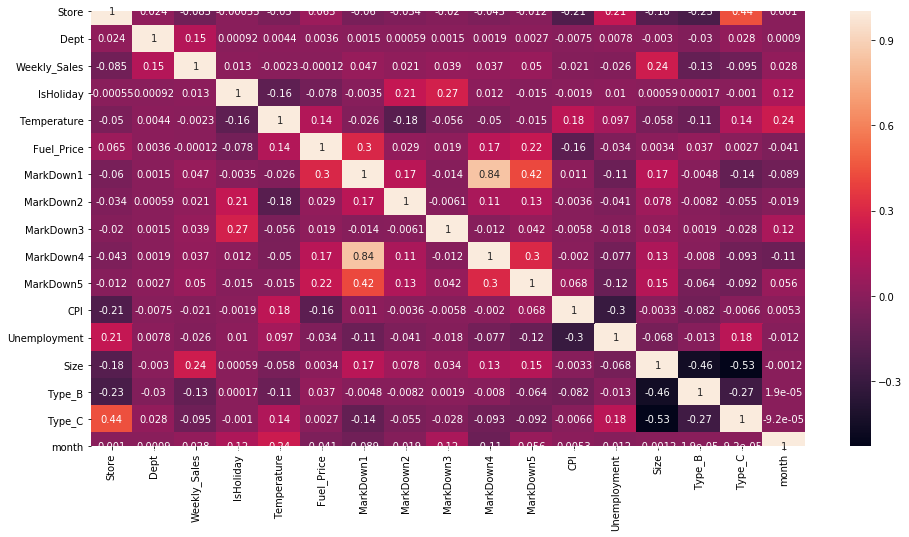

In [33]:
plt.figure(figsize = (16,8))
sns.heatmap(df.corr(),annot = True)
plt.show()

In [34]:
len(df.columns)

17

In [35]:
df.columns

Index(['Store', 'Dept', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Size', 'Type_B', 'Type_C',
       'month'],
      dtype='object')

## here iam dropping unnecessary columns


In [36]:
df.drop(['CPI','Unemployment','Fuel_Price'],axis= 1, inplace= True)

In [37]:
len(df.columns)

14

dropping Target varible(weeklysales) from training data

In [38]:
X = df.drop('Weekly_Sales', axis = 1).values

In [39]:
X.shape

(421570, 13)

In [40]:
y = df['Weekly_Sales'].values

In [41]:
y.shape

(421570,)

## split the data

In [42]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 100)

In [43]:
X_train.shape

(337256, 13)

In [44]:
y_train.shape

(337256,)

In [45]:
X_test.shape

(84314, 13)

## Linear Regression  Model

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
reg = LinearRegression()

In [48]:
reg.fit(X_train,y_train)

LinearRegression()

In [49]:
y_predictions = reg.predict(X_test)
y_predictions

array([25415.35754186, 19212.35201235, 15638.26682617, ...,
       15701.46848626, 18027.40675257, 15990.18623459])

In [50]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

- MSE is calculated by taking the average of the square of the difference between the original and predicted values of the data

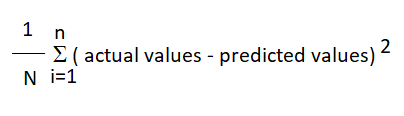

In [54]:
#mse
mse = mean_squared_error(y_test,y_predictions)
mse

465298564.77169186

- RMSE is the standard deviation of the errors which occur when a prediction is made on a dataset. This is the same as MSE (Mean Squared Error) but the root of the value is considered while determining the accuracy of the model

In [55]:
#rmse
np.sqrt(mse)

<IPython.core.display.Javascript object>

21570.780346841693

## XGB Regressor

In [109]:
import xgboost as xgb

In [134]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

- learning_rate: step size shrinkage used to prevent overfitting. Range is [0,1]
- max_depth: determines how deeply each tree is allowed to grow during any boosting round.
- subsample: percentage of samples used per tree. Low value can lead to underfitting.
- colsample_bytree: percentage of features used per tree. High value can lead to overfitting.
- n_estimators: number of trees you want to build.
- alpha: L1 regularization on leaf weights. A large value leads to more regularization.

In [135]:
xg_reg.fit(X_train,y_train)

y_pred = xg_reg.predict(X_test)

[16:33:18] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.


In [136]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse))

<IPython.core.display.Javascript object>

RMSE: 19079.882137


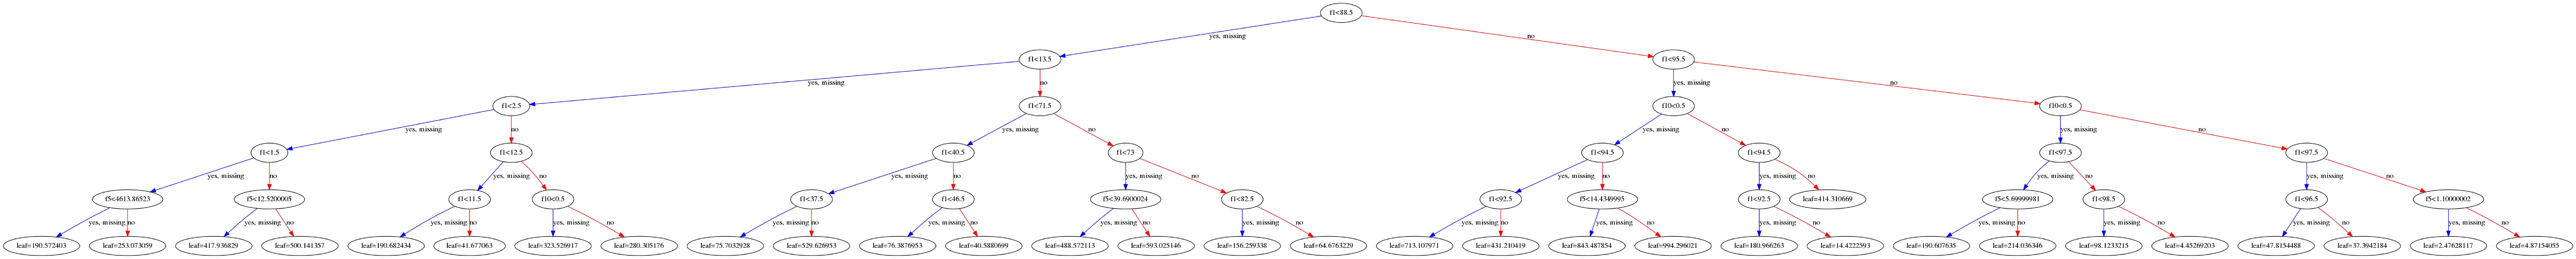

In [133]:
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [300, 30]
plt.show()

In [121]:
#!pip install graphviz

In [137]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

<IPython.core.display.Javascript object>

,Actual,Predicted
0,4231.56,9069.301758
1,780.00,8274.434570
2,3871.92,10910.189453
3,2521.31,6411.461914
4,110.58,4907.960449
...,...,...
84309,600.27,9909.222656
84310,5900.52,4239.992676
84311,1854.55,5431.126953
84312,21929.30,15275.471680


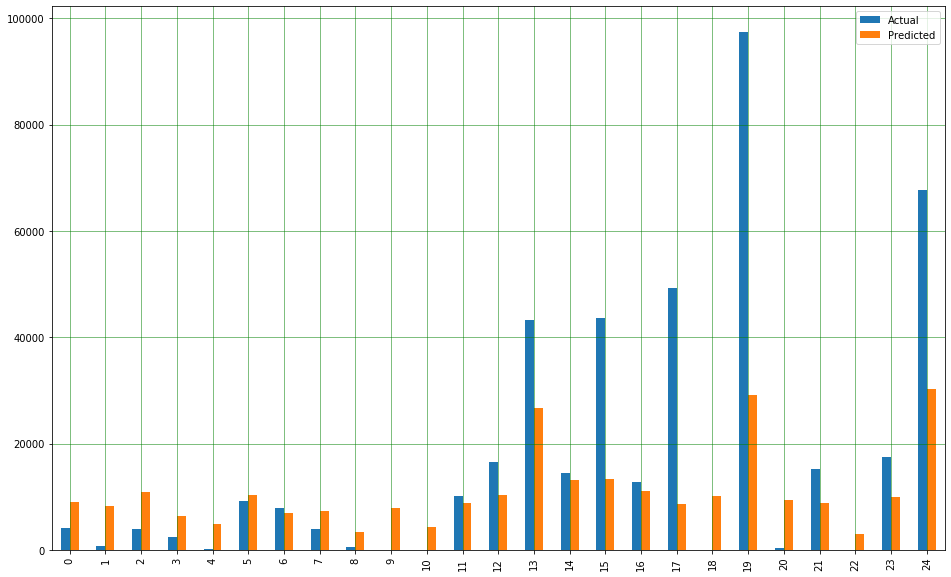

In [138]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [142]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 10532.624222445842
Mean Squared Error: 364041902.35225356


<IPython.core.display.Javascript object>

Root Mean Squared Error: 19079.882136749522


## SGD

“Gradient descent is an iterative algorithm, that starts from a random point on a function and travels down its slope in steps until it reaches the lowest point of that function."

In [56]:
from sklearn.model_selection import cross_val_score

In [58]:
cv_score = cross_val_score(reg,X_train,y_train, n_jobs = 4, cv = 5, scoring = 'neg_mean_squared_error')

In [61]:
np.sqrt(-(cv_score))

<IPython.core.display.Javascript object>

array([21348.93211289, 21289.96826573, 22094.16984949, 21988.32463185,
       21807.78672157])

In [62]:
from sklearn.linear_model import SGDRegressor

In [63]:
sgd = SGDRegressor()

In [64]:
sgd.fit(X_train, y_train)

SGDRegressor()

In [65]:
y_pred = sgd.predict(X_test)

In [66]:
sgd_error = mean_squared_error(y_test, y_pred)

In [68]:
sgd_error

2.16675431760229e+36

In [69]:
np.sqrt(sgd_error)

<IPython.core.display.Javascript object>

1.471989917629292e+18

## Test

using separate test data

In [72]:
test = pd.read_csv('/home/madanmaram/Lockdown/Algorithms Practice/walmart csv/test.csv')
test.head()

<IPython.core.display.Javascript object>

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [73]:
df.columns

Index(['Store', 'Dept', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'Size',
       'Type_B', 'Type_C', 'month'],
      dtype='object')

In [75]:
features = pd.read_csv('/home/madanmaram/Lockdown/Algorithms Practice/walmart csv/features.csv')
features.head(3)

<IPython.core.display.Javascript object>

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False


In [76]:
stores = pd.read_csv('/home/madanmaram/Lockdown/Algorithms Practice/walmart csv/stores.csv')
stores.head(3)

<IPython.core.display.Javascript object>

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392


In [79]:
test = test.merge(stores, how = 'left').merge(features, how = 'left')
test.head(3)

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
1,1,1,2012-11-09,False,A,151315,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573
2,1,1,2012-11-16,False,A,151315,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573


In [80]:
test.shape

(115064, 15)

In [81]:
#remove unnecessary features
test.drop(['CPI','Unemployment','Fuel_Price'], axis = 1, inplace = True)

In [82]:
test.shape

(115064, 12)

In [83]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115064 entries, 0 to 115063
Data columns (total 12 columns):
Store          115064 non-null int64
Dept           115064 non-null int64
Date           115064 non-null object
IsHoliday      115064 non-null bool
Type           115064 non-null object
Size           115064 non-null int64
Temperature    115064 non-null float64
MarkDown1      114915 non-null float64
MarkDown2      86437 non-null float64
MarkDown3      105235 non-null float64
MarkDown4      102176 non-null float64
MarkDown5      115064 non-null float64
dtypes: bool(1), float64(6), int64(3), object(2)
memory usage: 10.6+ MB


In [84]:
test.isna().sum()

Store              0
Dept               0
Date               0
IsHoliday          0
Type               0
Size               0
Temperature        0
MarkDown1        149
MarkDown2      28627
MarkDown3       9829
MarkDown4      12888
MarkDown5          0
dtype: int64

In [85]:
test.fillna(value = 0, inplace = True)

In [86]:
test.isna().sum()


Store          0
Dept           0
Date           0
IsHoliday      0
Type           0
Size           0
Temperature    0
MarkDown1      0
MarkDown2      0
MarkDown3      0
MarkDown4      0
MarkDown5      0
dtype: int64

In [87]:
date = pd.to_datetime(test['Date'])

<IPython.core.display.Javascript object>

In [88]:
test['month'] = date.dt.month

In [89]:
dummy = pd.get_dummies(test['Type'], drop_first= True, prefix = 'Type')
dummy

<IPython.core.display.Javascript object>

,Type_B,Type_C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
115059,1,0
115060,1,0
115061,1,0
115062,1,0


In [91]:
test = pd.concat([test, dummy], axis = 1)
test.head()

<IPython.core.display.Javascript object>

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,month,Type_B,Type_C
0,1,1,2012-11-02,False,A,151315,55.32,6766.44,5147.70,50.82,3639.90,2737.42,11,0,0
1,1,1,2012-11-09,False,A,151315,61.24,11421.32,3370.89,40.28,4646.79,6154.16,11,0,0
2,1,1,2012-11-16,False,A,151315,52.92,9696.28,292.10,103.78,1133.15,6612.69,11,0,0
3,1,1,2012-11-23,True,A,151315,56.23,883.59,4.17,74910.32,209.91,303.32,11,0,0
4,1,1,2012-11-30,False,A,151315,52.34,2460.03,0.00,3838.35,150.57,6966.34,11,0,0


In [92]:
test.columns

Index(['Store', 'Dept', 'Date', 'IsHoliday', 'Type', 'Size', 'Temperature',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5',
       'month', 'Type_B', 'Type_C'],
      dtype='object')

In [93]:
test.drop(['Type','Date'],axis=1,inplace = True)

In [94]:
len(test.columns)

13

In [95]:
len(df.columns)

14

In [96]:
test_pred = sgd.predict(test)

In [97]:
test_pred.shape

(115064,)

In [98]:
test.shape

(115064, 13)

## Making submission csv

ID = 1-1-2012-11-02 [store_dept_date]

weekly_sales = our predictions

In [101]:
data = pd.read_csv('/home/madanmaram/Lockdown/Algorithms Practice/walmart csv/test.csv')
data.head(3)

<IPython.core.display.Javascript object>

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False


In [102]:
Id = data['Store'].astype(str)+'_'+data['Dept'].astype(str)+'_'+data['Date'].astype(str)

In [103]:
Id[:2]

0    1_1_2012-11-02
1    1_1_2012-11-09
dtype: object

In [104]:
test_pred

array([1.05820602e+18, 1.16037295e+18, 1.11307358e+18, ...,
       7.89296297e+17, 7.63975052e+17, 7.31642818e+17])

In [106]:
data = {'Id':Id, 'Weekly_Sales':test_pred}

In [107]:
submission = pd.DataFrame(data = data)
submission.head(3)

<IPython.core.display.Javascript object>

,Id,Weekly_Sales
0,1_1_2012-11-02,1.058206e+18
1,1_1_2012-11-09,1.160373e+18
2,1_1_2012-11-16,1.113074e+18


In [108]:
submission.to_csv('output.csv',index = False)